In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = pd.read_csv('./archive/btcusd.csv')
data.head(-1)

,time,open,close,high,low,volume
0,1364774820000,93.25,93.30,93.30,93.25,93.300000
1,1364774880000,100.00,100.00,100.00,100.00,93.300000
2,1364774940000,93.30,93.30,93.30,93.30,33.676862
3,1364775060000,93.35,93.47,93.47,93.35,20.000000
4,1364775120000,93.47,93.47,93.47,93.47,2.021627
...,...,...,...,...,...,...
4311300,1679769960000,27529.00,27529.00,27529.00,27529.00,0.019081
4311301,1679770020000,27530.00,27528.00,27530.00,27528.00,0.224472
4311302,1679770080000,27521.00,27517.00,27521.00,27517.00,0.000189
4311303,1679770140000,27517.00,27526.00,27527.00,27517.00,0.005197


In [27]:
# Adding indicators
data['RSI']=ta.rsi(data.close, length=15)
data['EMAF']=ta.ema(data.close, length=20)
data['EMAM']=ta.ema(data.close, length=100)
data['EMAS']=ta.ema(data.close, length=150)

data['Target'] = data['close']-data.open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['high', 'low'],axis = 1, inplace=True)
#drop the first 4000000 rows from data
data = data[4000000:]

In [28]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,index,time,open,close,volume,RSI,EMAF,EMAM,EMAS,Target,TargetClass
4000000,4000149,1660872540000,22771.000000,22756.000000,3.175444,26.813425,22833.185426,22969.216194,23034.817127,26.000000,1
4000001,4000150,1660872600000,22759.000000,22785.000000,0.907839,35.825412,22828.596338,22965.568348,23031.508291,5.000000,1
4000002,4000151,1660872660000,22789.000000,22794.000000,28.759272,38.349662,22825.301449,22962.170955,23028.362486,2.956843,1
4000003,4000152,1660872720000,22794.043157,22797.000000,3.444918,39.203722,22822.606073,22958.900243,23025.298082,11.283173,1
4000004,4000153,1660872780000,22795.870283,22807.153456,129.988361,42.111752,22821.134395,22955.895356,23022.408749,15.271008,1
4000005,4000154,1660872840000,22810.728992,22826.000000,2.945999,47.140143,22821.597786,22953.323171,23019.807309,15.572360,1
4000006,4000155,1660872900000,22821.000000,22836.572360,188.058631,49.762950,22823.023936,22951.011274,23017.380356,-16.118390,0
4000007,4000156,1660872960000,22836.735825,22820.617435,1.464947,46.067078,22822.794745,22948.429218,23014.774224,-9.883256,0
4000008,4000157,1660873020000,22820.426697,22810.543442,2.920777,43.863230,22821.627954,22945.698806,23012.069181,-13.000000,0
4000009,4000158,1660873080000,22810.000000,22797.000000,0.973997,41.035480,22819.282435,22942.754275,23009.220583,1.915438,1


In [29]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [30]:
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.00000000e+00 0.00000000e+00 5.47759167e-01 ... 5.69635337e-01
  5.71857367e-01 1.00000000e+00]
 [3.21383233e-06 3.17499627e-06 5.46853780e-01 ... 5.69378041e-01
  5.60447475e-01 1.00000000e+00]
 [6.42766467e-06 6.34999253e-06 5.49117248e-01 ... 5.69133421e-01
  5.59337370e-01 1.00000000e+00]
 ...
 [9.99993572e-01 9.99993650e-01 9.06141542e-01 ... 9.20067057e-01
  5.62620787e-01 1.00000000e+00]
 [9.99996786e-01 9.99996825e-01 9.05839746e-01 ... 9.20051226e-01
  5.56644177e-01 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 9.06594236e-01 ... 9.20034575e-01
  5.57730834e-01 0.00000000e+00]]


In [31]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

311156
[[[0.00000000e+00 0.00000000e+00 5.47759167e-01 ... 2.51005414e-01
   5.52002024e-01 5.63442367e-01]
  [3.21383233e-06 3.17499627e-06 5.46853780e-01 ... 3.46157885e-01
   5.51649889e-01 5.63159517e-01]
  [6.42766467e-06 6.34999253e-06 5.49117248e-01 ... 3.72810011e-01
   5.51397062e-01 5.62896086e-01]
  ...
  [8.67734730e-05 8.57248993e-05 5.45248524e-01 ... 2.62202994e-01
   5.48556849e-01 5.57882234e-01]
  [8.99873054e-05 8.88998955e-05 5.43684334e-01 ... 2.96673793e-01
   5.48152814e-01 5.57629643e-01]
  [9.32011377e-05 9.20748918e-05 5.45269353e-01 ... 3.60960708e-01
   5.47904186e-01 5.57406621e-01]]

 [[3.21383233e-06 3.17499627e-06 5.46853780e-01 ... 3.46157885e-01
   5.51649889e-01 5.63159517e-01]
  [6.42766467e-06 6.34999253e-06 5.49117248e-01 ... 3.72810011e-01
   5.51397062e-01 5.62896086e-01]
  [9.64149700e-06 9.52498881e-06 5.49497748e-01 ... 3.81827543e-01
   5.51190237e-01 5.62642479e-01]
  ...
  [8.99873054e-05 8.88998955e-05 5.43684334e-01 ... 2.96673793e-01
   

In [32]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [33]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

248900
(248900, 30, 8)
(62226, 30, 8)
(248900, 1)
(62226, 1)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [34]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
14934/14934 [==============================] - 179s 12ms/step - loss: 0.2421 - val_loss: 0.2508
Epoch 2/30
14934/14934 [==============================] - 182s 12ms/step - loss: 0.2409 - val_loss: 0.2487
Epoch 3/30
14934/14934 [==============================] - 181s 12ms/step - loss: 0.2407 - val_loss: 0.2467
Epoch 4/30
14934/14934 [==============================] - 184s 12ms/step - loss: 0.2406 - val_loss: 0.2474
Epoch 5/30
12725/14934 [========================>.....] - ETA: 25s - loss: 0.2407

KeyboardInterrupt: 

In [35]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

1945/1945 [==============================] - 13s 7ms/step
[0.49413043] [0.]
[0.49217883] [0.]
[0.49073058] [1.]
[0.49055082] [0.]
[0.4893989] [1.]
[0.49396828] [0.]
[0.49608517] [0.]
[0.4981146] [0.]
[0.50166094] [0.]
[0.50565666] [1.]


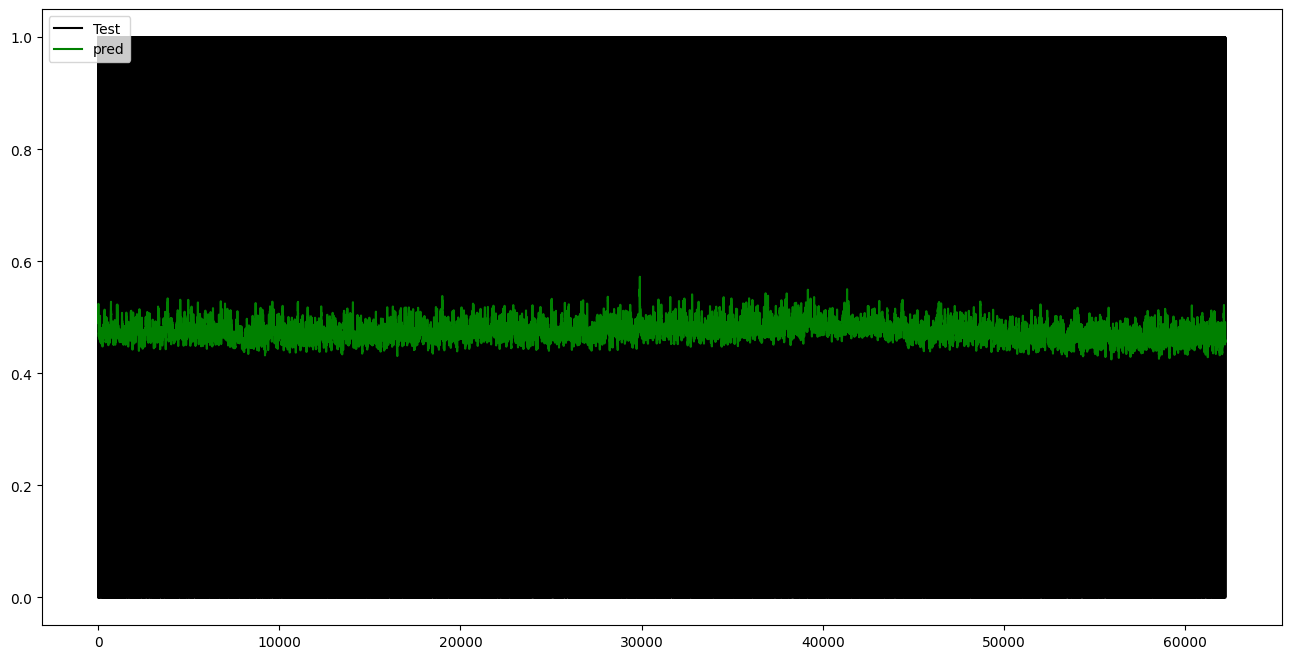

In [36]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()